In [1]:
import numpy as np
import pandas as pd

- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)


In [2]:
url = 'C:/Users/csh51/Desktop/SSAFY/personal project/housing/'

# train 데이터를 불러옴
house_data = pd.read_csv(url + 'train.csv')

house_data.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [3]:
house_data.dtypes

id                 int64
Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

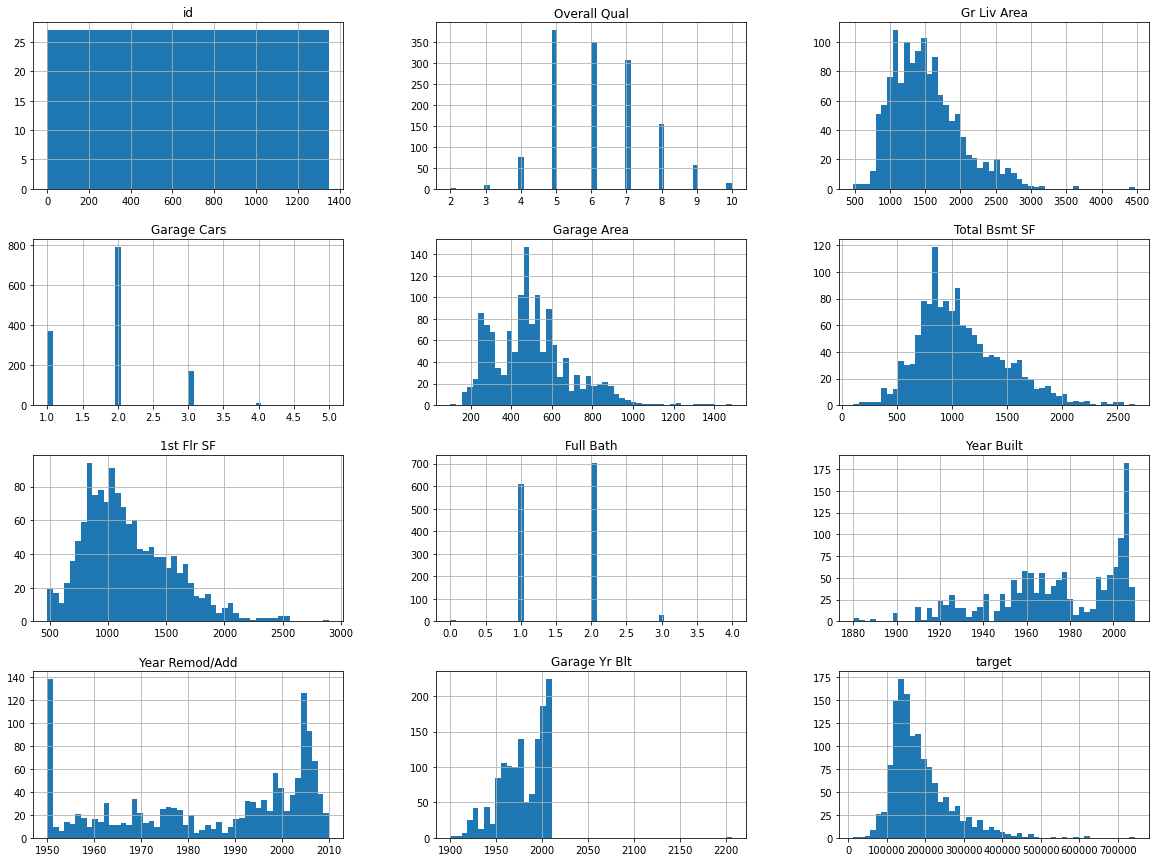

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
house_data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [5]:
# 상관관계 조사
corr_matrix = house_data.corr()

corr_matrix['target'].sort_values(ascending = False)

target            1.000000
Overall Qual      0.810607
Gr Liv Area       0.742061
Total Bsmt SF     0.664047
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
id                0.022934
Name: target, dtype: float64

In [6]:
housing = house_data.drop('target', axis = 1) # 예측변수
housing_labels = house_data['target'].copy() # 레이블 분리

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# 숫자가 아닌 부분은 제거
housing_num = housing.drop(['Exter Qual','Kitchen Qual','Bsmt Qual'], axis = 1)

In [11]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [14]:
print(imputer.statistics_)
print(housing_num.median().values)

[ 675.5    6.  1445.5    2.   484.  1009.  1092.5    2.  1976.  1993.
 1978.5]
[ 675.5    6.  1445.5    2.   484.  1009.  1092.5    2.  1976.  1993.
 1978.5]


In [18]:
X = imputer.transform(housing_num)
X

array([[1.000e+00, 1.000e+01, 2.392e+03, ..., 2.003e+03, 2.003e+03,
        2.003e+03],
       [2.000e+00, 7.000e+00, 1.352e+03, ..., 2.006e+03, 2.007e+03,
        2.006e+03],
       [3.000e+00, 5.000e+00, 9.000e+02, ..., 1.967e+03, 1.967e+03,
        1.967e+03],
       ...,
       [1.348e+03, 5.000e+00, 1.214e+03, ..., 1.967e+03, 1.967e+03,
        1.967e+03],
       [1.349e+03, 5.000e+00, 8.940e+02, ..., 1.974e+03, 1.974e+03,
        1.974e+03],
       [1.350e+03, 5.000e+00, 9.070e+02, ..., 1.978e+03, 1.978e+03,
        1.978e+03]])

In [19]:
# 넘파이 배열을 데이터 프레임으로 변환
housing_tr = pd.DataFrame(X, columns = housing_num.columns, 
                          index = housing_num.index)
housing_tr

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1.0,10.0,2392.0,3.0,968.0,2392.0,2392.0,2.0,2003.0,2003.0,2003.0
1,2.0,7.0,1352.0,2.0,466.0,1352.0,1352.0,2.0,2006.0,2007.0,2006.0
2,3.0,5.0,900.0,1.0,288.0,864.0,900.0,1.0,1967.0,1967.0,1967.0
3,4.0,5.0,1174.0,2.0,576.0,680.0,680.0,1.0,1900.0,2006.0,2000.0
4,5.0,7.0,1958.0,3.0,936.0,1026.0,1026.0,2.0,2005.0,2005.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...
1345,1346.0,6.0,1756.0,2.0,422.0,872.0,888.0,2.0,1996.0,1997.0,1996.0
1346,1347.0,9.0,2748.0,3.0,850.0,1850.0,1850.0,2.0,2006.0,2006.0,2006.0
1347,1348.0,5.0,1214.0,1.0,318.0,1214.0,1214.0,2.0,1967.0,1967.0,1967.0
1348,1349.0,5.0,894.0,2.0,440.0,864.0,894.0,1.0,1974.0,1974.0,1974.0


In [20]:
# 텍스트 범주 다루기
housing_cat = housing[['Exter Qual','Kitchen Qual','Bsmt Qual']]
housing_cat.head()

,Exter Qual,Kitchen Qual,Bsmt Qual
0,Ex,Ex,Ex
1,Gd,Gd,Ex
2,TA,TA,TA
3,TA,Gd,TA
4,Gd,Gd,Gd


In [22]:
# 카테고리를 숫자로 변환
from sklearn.preprocessing import OrdinalEncoder
oridnal_encoder = OrdinalEncoder()
housing_cat_encoded = oridnal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0., 0., 0.],
       [2., 2., 0.],
       [3., 3., 4.],
       [3., 2., 4.],
       [2., 2., 2.],
       [2., 0., 0.],
       [3., 3., 4.],
       [2., 2., 2.],
       [2., 2., 0.],
       [2., 2., 0.]])

In [24]:
oridnal_encoder.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)]

In [25]:
# 카테고리 중 하나의 범주만 1로 지정
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<1350x13 sparse matrix of type '<class 'numpy.float64'>'
	with 4050 stored elements in Compressed Sparse Row format>

In [27]:
housing_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
cat_encoder.categories_

[array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


